In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# setting plot style
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())

# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'sans-serif'

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16

# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

---

# Q4

Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE. [1 mark]

<______________- ________derivation____ - __________________>

In [3]:
# Generating 1000 sample from exponential distribution
lambda_true = 4.0           # rate parameter of exponential distribution
n = 1000

_exponential = torch.distributions.exponential.Exponential(rate=lambda_true)    # creating object of exponential distribution
data = _exponential.sample((n,))                                                # generating 1000 samples from exponential distribution

In [4]:
# defining negative log likelihood function (loss function)
def nll_eponential_dist(lambda_param, X):
    n = X.shape[0]
    return -n*torch.log(lambda_param) + lambda_param * torch.sum(X)

In [5]:
# optimizing lambda parameter using gradient descent
lr = 0.01
num_itr = 10000

lambda_param = torch.tensor([0.1], dtype=torch.float32, requires_grad=True)

optimizer = torch.optim.Adam([lambda_param], lr=lr)

for i in range(num_itr):
    optimizer.zero_grad()
    loss = nll_eponential_dist(lambda_param, data)
    loss.backward()
    optimizer.step()

print(lambda_param[0])

tensor(4.0907, grad_fn=<SelectBackward0>)


### Conclusion:
- We are able to recover the true value of the parameter $\lambda$ using gradient descent based solution for obtaining MLE. The recovered value is very close to the true value of $\lambda$ (upto one decimal place).
- The recovered value changes as the different samples are drawn from the distribution. The gradient descent based approach is finding the optimal value of $\lambda$ for the given sample. Therefore, each time we draw the sample, there is sligh variation in sample itself and the recovered value of $\lambda$ is different because of finite sample size. In other words, the recovered $\lambda$ is sample rate parameter and the true lambda is population rate parameter.
- As we increase the sample size, the sample reaches towards population and the recovered value of $\lambda$ converges to the true value of $\lambda$.

Some of the $\lambda$ values for different samples (true value of $\lambda$ is 4):
4.0503, 4.0639, 4.1581, 3.7236

---

# Q5
Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? [1 mark]

In [3]:
def nll_normal_dist(parameters, X):
    '''
    Negative log-likelihood for a normal distribution.
    '''
    mu, sigma = parameters
    n = len(X)
    return (n/2)*torch.log(torch.tensor(2*np.pi)) + (n/2)*torch.log(sigma**2) + (1/(2*sigma**2))*torch.sum((X - mu)**2)

In [4]:
def MLE_normal_dist(data):
    '''
    Compute the MLE of the mean and variance of a normal distribution given data.
    '''
    lr = 0.05
    num_itr = 30000

    mu_param = 0.0
    sigma_param = 0.1       # sigma_param != 0.0 otherwise torch.log(sigma**2) will be undefined and loss.backward() will return None
    parameters = torch.tensor([mu_param, sigma_param], requires_grad=True)
    optimizer = torch.optim.Adam([parameters], lr=lr)

    for i in range(num_itr):
        optimizer.zero_grad()
        loss = nll_normal_dist(parameters, data)
        loss.backward()
        optimizer.step()
    return parameters[0].detach(), parameters[1].detach()

In [ ]:
mu_true = 2.0
sigma_true = 4.0
random_seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# random_seeds = [1, 2, 3]
mu_tensor = torch.empty((8, 10))        # 8 dataste_sizes, 10 random seeds
sigma_tensor = torch.empty((8, 10))     # 8 dataste_sizes, 10 random seeds
dataset_sizes = [10, 20, 50, 100, 500, 1000, 5000, 10000]
i = 0
for dataste_size in dataset_sizes:
# for dataste_size in [10000]:
    j = 0
    for seed in random_seeds:
        torch.manual_seed(seed)
        _normal = torch.distributions.Normal(loc=mu_true, scale=sigma_true)
        data = _normal.sample((dataste_size,))
        mu_estimated = MLE_normal_dist(data)[0]
        sigma_estimated = MLE_normal_dist(data)[1]
        mu_tensor[i][j] = mu_estimated
        sigma_tensor[i][j] = sigma_estimated
        print("inner loop", i, j, mu_estimated, sigma_estimated)
        j += 1
    i += 1

In [ ]:
# for each of the dataset size, find the average mu and sigma
mus = torch.mean(mu_tensor, dim=1)
sigmas = torch.mean(sigma_tensor, dim=1)

print("mus: ", mus)
print("sigmas: ", sigmas)

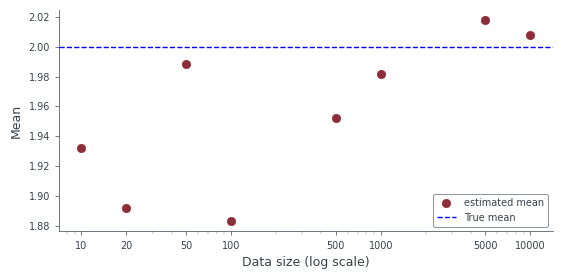

In [59]:
# Plotting the mean vs dataset size
plt.scatter(dataset_sizes, mus, label = "estimated mean")
plt.axhline(y=mu_true, color='blue', linestyle='--', label='True mean')
plt.xlabel("Data size (log scale)")
plt.ylabel("Mean")
plt.xscale("log")
plt.xticks(dataset_sizes, dataset_sizes)
plt.legend()
plt.show()

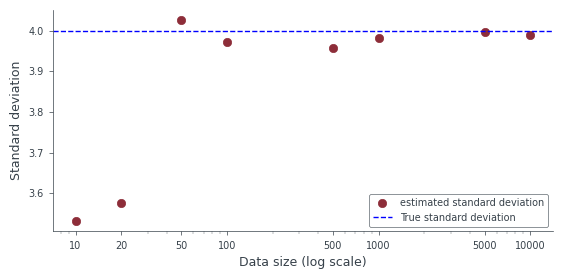

In [58]:
# Plotting the varience vs dataset size
plt.scatter(dataset_sizes, sigmas, label = "estimated standard deviation")
plt.axhline(y=sigma_true, color='blue', linestyle='--', label='True standard deviation')
plt.xlabel("Data size (log scale)")
plt.ylabel("Standard deviation")
plt.xscale("log")
plt.xticks(dataset_sizes, dataset_sizes)
plt.legend()
plt.show()

### Conclusion
- Mean is an unbiased estimator of the population mean.
- Variance is a biased estimator of the population variance.